# __ROC__(Receiver Operating Characteristics) and __AUC__(Area Under the Curve) practice

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

- 여성이라고 판단한 평가 점수(score)의 순서가 다음과 같다고 가정하겠다. (이 score 값은 임의로 준 것임)

In [4]:
y_score = np.linspace(99,60,20).round(1)
print(y_score)

[99.  96.9 94.9 92.8 90.8 88.7 86.7 84.6 82.6 80.5 78.5 76.4 74.4 72.3
 70.3 68.2 66.2 64.1 62.1 60. ]


- 이 점수를 근거로 상위 8명을 여성이라고 분류 예측했다고 하자.

In [6]:
y_pred=[1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]
print(len(y_pred))
y_pred.count(1), y_pred.count(0)

20


(8, 12)

- 위의 점수 순으로 배치하여 확인한 실제 값(여성과 남서의) 분포가 아래와 같다고 하자.

In [7]:
y_test = [1,1,0,1,0,1,1,1,0,0,1,0,1,1,0,1,0,0,0,0]
y_test.count(1), y_test.count(0)


(10, 10)

- 이 데이터를 바탕으로 혼돈 매트릭스를 구하면 아래와 같다.

In [8]:
confusion_matrix(y_test, y_pred)

array([[8, 2],
       [4, 6]])

- 정밀도, 재현률, F1점수를 구하면 아래와 같다.

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.75      0.60      0.67        10

   micro avg       0.70      0.70      0.70        20
   macro avg       0.71      0.70      0.70        20
weighted avg       0.71      0.70      0.70        20



- 이제 분류 예측한 순서를 평가해보겠다. 먼저 점수, 예측 값, 실제 값을 하나의 데이터프레임으로 만들어 보겠다.

In [10]:
result = pd.DataFrame(list(zip(y_score, y_pred, y_test)), columns=['score', 'predict', 'real'])
result['correct'] = (result.predict == result.real)
result.head(10)

,score,predict,real,correct
0,99.0,1,1,True
1,96.9,1,1,True
2,94.9,1,0,False
3,92.8,1,1,True
4,90.8,1,0,False
5,88.7,1,1,True
6,86.7,1,1,True
7,84.6,1,1,True
8,82.6,0,0,True
9,80.5,0,0,True


- 이제 점수를 고려하ㅕ ROC 커브와 AUC를 구하면 아래와 같다.

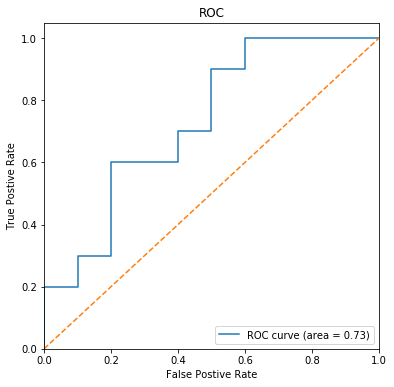

In [11]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _= roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('ROC')
plt.legend(loc="lower right")